1/1 [==============================] - 0s 380ms/step
prediction: 0.53984
Predicted probability: 0.54
Predicted ASD with probability: 0.54


  0%|          | 0/10000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 337ms/step


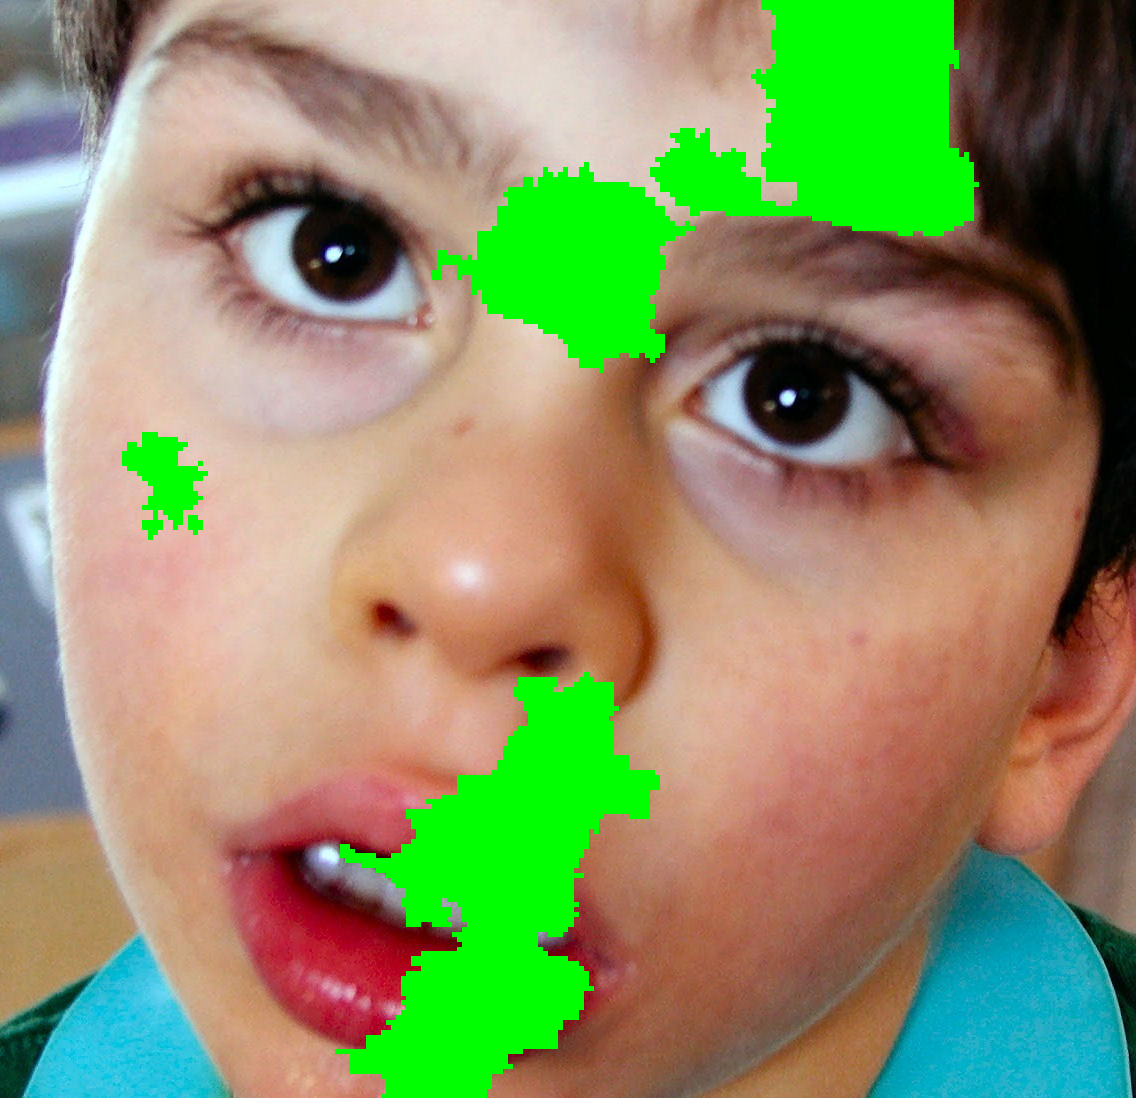

In [7]:
import cv2
import numpy as np
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.models import Model, load_model
from lime.lime_image import LimeImageExplainer
from PIL import Image
from tensorflow.keras.layers import GlobalAveragePooling2D, Reshape, Dense
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries

# Define paths
input_image_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/ASD/0486.jpg' # Replace with your image path
model_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/ResNet50V2/ResNet50V2Model.h5'
target_size = (224, 224)


# Load the pre-trained ResNet50 model
base_model = ResNet50V2(weights='imagenet', include_top=True)

x = base_model.get_layer('avg_pool').output
x = Dense(255, activation='relu')(x)
x = Reshape((1, 1, 255))(x) # Add this line to reshape the output of GlobalAveragePooling2D
x = GlobalAveragePooling2D()(x)
prediction = Dense(1, activation='sigmoid')(x)

# Create a new model that takes the input of ResNet50 and outputs the desired layer
model = Model(inputs=base_model.input, outputs=prediction)

# Process the input image
img = cv2.imread(input_image_path)
img = cv2.resize(img, target_size)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)

img_scaled = img / 255

# Predict ASD probability using the trained model and extracted features
prediction = model.predict(img)[0][0] # Access the first element for ASD probability
print("prediction: {:.5f}".format(prediction))

rounded_prediction = round(prediction, 2)
print(f"Predicted probability: {rounded_prediction:.2f}")

if rounded_prediction > 0.5:
    print(f"Predicted ASD with probability: {rounded_prediction:.2f}")

    explainer = LimeImageExplainer()

    # Generate an explanation for the prediction using the explainer object
    explanation = explainer.explain_instance(img_scaled[0], model.predict, top_labels=1, hide_color=0, num_samples=10000, random_seed=42)

    # Visualize the explanation using matplotlib
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)

    # Resize the explanation mask to match the original image dimensions
    mask = cv2.resize(mask, (target_size[0], target_size[1]), interpolation=cv2.INTER_NEAREST)

    # Convert the mask to the original image mode
    original_image = Image.open(input_image_path)
    #original_image = original_image.convert("L")  # Convert the original image to grayscale
    original_width, original_height = original_image.size
    original_mode = original_image.mode

    # Overlay the explanation mask on the original image
    mask = cv2.resize(mask, (original_width, original_height), interpolation=cv2.INTER_NEAREST)
    original_image = np.array(original_image)
    original_image[mask > 0.5] = (0, 255, 0)

    # Display the original image with the explanation mask
    display(Image.fromarray(original_image))

else:
    print(f"Predicted non-ASD with probability: {1 - rounded_prediction:.2f}")

1/1 [==============================] - 0s 305ms/step
prediction: 0.72689
Predicted probability: 0.73
Predicted ASD with probability: 0.73


  0%|          | 0/10000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 363ms/step


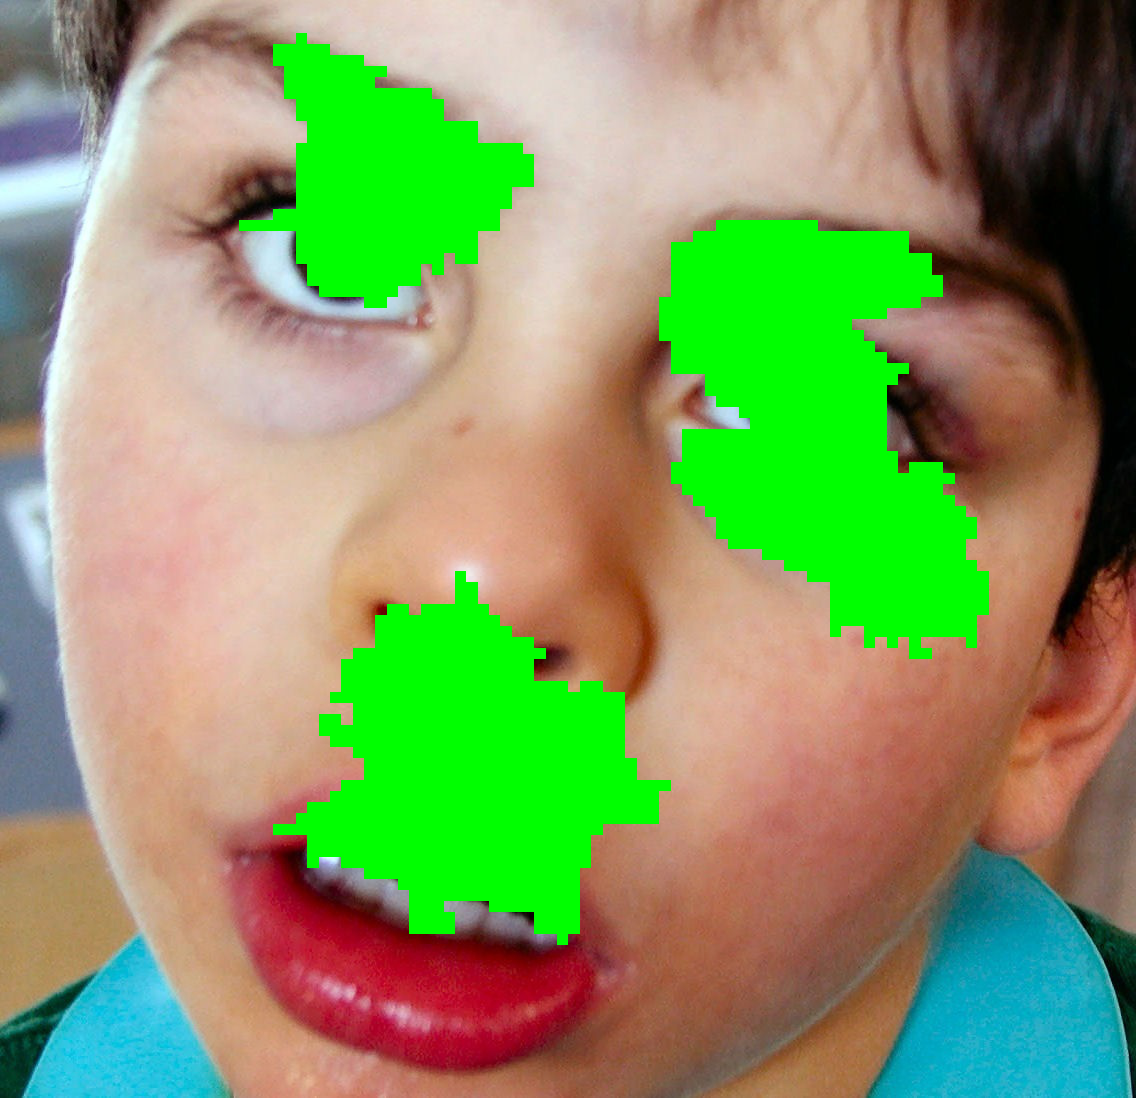

In [13]:
import cv2
import numpy as np
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.models import Model, load_model
from lime.lime_image import LimeImageExplainer
from PIL import Image
from tensorflow.keras.layers import GlobalAveragePooling2D, Reshape, Dense
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries, quickshift
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries

# Define paths
input_image_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/ASD/0486.jpg' # Replace with your image path
model_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/ResNet50V2/ResNet50V2Model.h5'
target_size = (224, 224)


# Load the pre-trained ResNet50 model
base_model = ResNet50V2(weights='imagenet', include_top=True)

x = base_model.get_layer('avg_pool').output
x = Dense(255, activation='relu')(x)
x = Reshape((1, 1, 255))(x) # Add this line to reshape the output of GlobalAveragePooling2D
x = GlobalAveragePooling2D()(x)
prediction = Dense(1, activation='sigmoid')(x)

# Create a new model that takes the input of ResNet50 and outputs the desired layer
model = Model(inputs=base_model.input, outputs=prediction)

# Process the input image
img = cv2.imread(input_image_path)
img = cv2.resize(img, target_size)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)

img_scaled = img / 255

# Predict ASD probability using the trained model and extracted features
prediction = model.predict(img)[0][0] # Access the first element for ASD probability
print("prediction: {:.5f}".format(prediction))

rounded_prediction = round(prediction, 2)
print(f"Predicted probability: {rounded_prediction:.2f}")

if rounded_prediction > 0.5:
    print(f"Predicted ASD with probability: {rounded_prediction:.2f}")

    explainer = LimeImageExplainer()

    # Generate an explanation for the prediction using the explainer object
    explanation = explainer.explain_instance(img_scaled[0], model.predict, top_labels=1, hide_color=0, num_samples=10000, random_seed=42)

    # Visualize the explanation using matplotlib
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
    
    # Resize the explanation mask to match the original image dimensions
    mask = cv2.resize(mask, (target_size[0], target_size[1]), interpolation=cv2.INTER_NEAREST)
    
    # Resize temp array to 100x100
    temp = cv2.resize(temp, (100, 100), interpolation=cv2.INTER_NEAREST)
    
    # Resize the explanation mask to 100x100
    mask = cv2.resize(mask, (100, 100), interpolation=cv2.INTER_NEAREST)
    
    # Convert the mask to the original image mode
    original_image = Image.open(input_image_path)
    original_width, original_height = original_image.size
    original_mode = original_image.mode
    
    # Overlay the explanation mask on the original image
    mask = cv2.resize(mask, (original_width, original_height), interpolation=cv2.INTER_NEAREST)
    original_image = np.array(original_image)
    original_image[mask > 0.5] = (0, 255, 0)
    
    # Display the original image with the explanation mask
    display(Image.fromarray(original_image))



else:
    print(f"Predicted non-ASD with probability: {1 - rounded_prediction:.2f}")